<div class="alert alert-block alert-info">
<h1> Case Study 1 </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px # for USA map
from mpl_toolkits import mplot3d # for 3D graph
%config InlineBackend.figure_format = 'retina'

import seaborn as sns # for heatmap
from sklearn.model_selection import train_test_split # to split the dataset
import statsmodels.api as sm # Linear Regression Approach 1
from sklearn.linear_model import LinearRegression # Linear Regression Approach 2
from sklearn.metrics import r2_score # to evaluate predictions


### 1. Dataset Pre-processing

In [2]:
df = pd.read_csv('loans_full_schema.csv')
df.head(10)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   
5                      NaN         NaN    KY           OWN        34000.0   
6                      hr         10.0    MI      MORTGAGE        35000.0   
7                   police        10.0    AZ      MORTGAGE       110000.0   
8                    parts        10.0    NV      MORTGAGE        65000.0   
9               4th person         3.0    IL          RENT        30000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   
5     Not Verified            6.46                  NaN   
6  Source Verified           23.66             155000.0   
7  Source Verified           16.19                  NaN   
8  Source Verified           36.48                  NaN   
9     Not Verified           18.91                  NaN   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   
5                       NaN                   NaN  ...         A3   
6              Not Verified                 13.12  ...         C2   
7                       NaN                   NaN  ...         B5   
8                       NaN                   NaN  ...         C2   
9                       NaN                   NaN  ...         A3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0     Mar-2018      Current                   whole                 Cash   
1     Feb-2018      Current                   whole                 Cash   
2     Feb-2018      Current              fractional                 Cash   
3     Jan-2018      Current                   whole                 Cash   
4     Mar-2018      Current                   whole                 Cash   
5     Jan-2018      Current                   whole                 Cash   
6     Jan-2018      Current                   whole                 Cash   
7     Jan-2018      Current                   whole                 Cash   
8     Feb-2018      Current                   whole                 Cash   
9     Mar-2018      Current              fractional                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  
5   4256.71      873.13          743.29         129.84             0.0  
6  22560.00     2730.51         1440.00        1290.51             0.0  
7  19005.39     1765.84          994.61         771.23             0.0  
8  18156.66     2703.22         1843.34         859.88             0.0  
9   6077.13      391.15          322.87          68.28             0.0  

[10 rows x 55 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

#### 1.1 Remove NULL values

Let's see how many NULL values we have in our dataset.

In [4]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Unfortunately there are columns where most of values are NULLs. They are completely useless, so just remove those columns where more than 1% of the rows for that column contain a null value.

In [5]:
df_cleaned = df[[label for label in df if df[label].isnull().sum() <= 0.01 * df.shape[0]]]

Let's see how it looks like now.

In [6]:
df_cleaned.isnull().sum()

state                            0
homeownership                    0
annual_income                    0
verified_income                  0
debt_to_income                  24
delinq_2y                        0
earliest_credit_line             0
inquiries_last_12m               0
total_credit_lines               0
open_credit_lines                0
total_credit_limit               0
total_credit_utilized            0
num_collections_last_12m         0
num_historical_failed_to_pay     0
current_accounts_delinq          0
total_collection_amount_ever     0
current_installment_accounts     0
accounts_opened_24m              0
num_satisfactory_accounts        0
num_accounts_30d_past_due        0
num_active_debit_accounts        0
total_debit_limit                0
num_total_cc_accounts            0
num_open_cc_accounts             0
num_cc_carrying_balance          0
num_mort_accounts                0
account_never_delinq_percent     0
tax_liens                        0
public_record_bankru

Ok, much better. Now we have to do something with those NULL values. We can:

* remove rows cointain NULL values,
* fill them with median or mode value,
* or use some imputation and try to predict their missing values.

Let's try the first option and see what will happen.

In [7]:
df_cleaned = df_cleaned.dropna()
df_cleaned.shape[0] / df.shape[0]

0.9976

It looks good, we removed less than 0.3% of rows. I think it's good enough and there's no point to do something more with that.

#### 1.2 Remove useless columns

Let's take a look on our cleaned dataset.

In [8]:
df_cleaned.head(10)

state homeownership  annual_income  verified_income  debt_to_income  \
0    NJ      MORTGAGE        90000.0         Verified           18.01   
1    HI          RENT        40000.0     Not Verified            5.04   
2    WI          RENT        40000.0  Source Verified           21.15   
3    PA          RENT        30000.0     Not Verified           10.16   
4    CA          RENT        35000.0         Verified           57.96   
5    KY           OWN        34000.0     Not Verified            6.46   
6    MI      MORTGAGE        35000.0  Source Verified           23.66   
7    AZ      MORTGAGE       110000.0  Source Verified           16.19   
8    NV      MORTGAGE        65000.0  Source Verified           36.48   
9    IL          RENT        30000.0     Not Verified           18.91   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  2001                   6                  28   
1          0                  1996                   1                  30   
2          0                  2006                   4                  31   
3          0                  2007                   0                   4   
4          0                  2008                   7                  22   
5          1                  1990                   6                  32   
6          0                  2004                   1                  12   
7          1                  2005                   1                  30   
8          1                  1998                   3                  35   
9          0                  2001                   0                   9   

   open_credit_lines  ...  sub_grade  issue_month  loan_status  \
0                 10  ...         C3     Mar-2018      Current   
1                 14  ...         C1     Feb-2018      Current   
2                 10  ...         D1     Feb-2018      Current   
3                  4  ...         A3     Jan-2018      Current   
4                 16  ...         C3     Mar-2018      Current   
5                 12  ...         A3     Jan-2018      Current   
6                 10  ...         C2     Jan-2018      Current   
7                 15  ...         B5     Jan-2018      Current   
8                 21  ...         C2     Feb-2018      Current   
9                  6  ...         A3     Mar-2018      Current   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                   whole                 Cash  27015.86     1999.33   
1                   whole                 Cash   4651.37      499.12   
2              fractional                 Cash   1824.63      281.80   
3                   whole                 Cash  18853.26     3312.89   
4                   whole                 Cash  21430.15     2324.65   
5                   whole                 Cash   4256.71      873.13   
6                   whole                 Cash  22560.00     2730.51   
7                   whole                 Cash  19005.39     1765.84   
8                   whole                 Cash  18156.66     2703.22   
9              fractional                 Cash   6077.13      391.15   

   paid_principal  paid_interest  paid_late_fees  
0          984.14        1015.19             0.0  
1          348.63         150.49             0.0  
2          175.37         106.43             0.0  
3         2746.74         566.15             0.0  
4         1569.85         754.80             0.0  
5          743.29         129.84             0.0  
6         1440.00        1290.51             0.0  
7          994.61         771.23             0.0  
8         1843.34         859.88             0.0  
9          322.87          68.28             0.0  

[10 rows x 46 columns]

As we can see, "issue_month" only includes three values: "Jan-2018", "Feb-2018", and "Mar-2018". The time does not vary much and its impact to the applicant's credit profile is negligible. Thus column "issue_month" can be dropped.

The same goes for "disbursement_method" which only includes two values: "Cash" and "DirectPay". The impact of these methods to the applicant's credit profile can also be neglected. Thus column "disbursement_method" can also be dropped.

Since "sub_grade" (a grade assigned to the loan applicant based on his credit profile which determines the interest rate) has fully included the information of "grade", column "grade" can be dropped as well. A detailed explanation of subgrade can be found here: https://www.lendingclub.com/public/rates-and-fees.action

Since the three major US credit bureaus no longer include tax liens on your credit reports, a tax lien is no longer able to affect your credit. Thus, column "tax_liens" can be dropped. Details can be found here: https://www.bankrate.com/finance/credit-cards/how-tax-liens-affect-your-credit-score/, 

In [9]:
df_cleaned = df_cleaned.drop(["grade", "issue_month", "disbursement_method", "tax_liens"], axis=1)
df_cleaned.head(10)

state homeownership  annual_income  verified_income  debt_to_income  \
0    NJ      MORTGAGE        90000.0         Verified           18.01   
1    HI          RENT        40000.0     Not Verified            5.04   
2    WI          RENT        40000.0  Source Verified           21.15   
3    PA          RENT        30000.0     Not Verified           10.16   
4    CA          RENT        35000.0         Verified           57.96   
5    KY           OWN        34000.0     Not Verified            6.46   
6    MI      MORTGAGE        35000.0  Source Verified           23.66   
7    AZ      MORTGAGE       110000.0  Source Verified           16.19   
8    NV      MORTGAGE        65000.0  Source Verified           36.48   
9    IL          RENT        30000.0     Not Verified           18.91   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  2001                   6                  28   
1          0                  1996                   1                  30   
2          0                  2006                   4                  31   
3          0                  2007                   0                   4   
4          0                  2008                   7                  22   
5          1                  1990                   6                  32   
6          0                  2004                   1                  12   
7          1                  2005                   1                  30   
8          1                  1998                   3                  35   
9          0                  2001                   0                   9   

   open_credit_lines  ...  interest_rate  installment  sub_grade  loan_status  \
0                 10  ...          14.07       652.53         C3      Current   
1                 14  ...          12.61       167.54         C1      Current   
2                 10  ...          17.09        71.40         D1      Current   
3                  4  ...           6.72       664.19         A3      Current   
4                 16  ...          14.07       786.87         C3      Current   
5                 12  ...           6.72       153.75         A3      Current   
6                 10  ...          13.59       553.35         C2      Current   
7                 15  ...          11.99       444.79         B5      Current   
8                 21  ...          13.59       679.58         C2      Current   
9                  6  ...           6.71       196.77         A3      Current   

   initial_listing_status   balance  paid_total  paid_principal  \
0                   whole  27015.86     1999.33          984.14   
1                   whole   4651.37      499.12          348.63   
2              fractional   1824.63      281.80          175.37   
3                   whole  18853.26     3312.89         2746.74   
4                   whole  21430.15     2324.65         1569.85   
5                   whole   4256.71      873.13          743.29   
6                   whole  22560.00     2730.51         1440.00   
7                   whole  19005.39     1765.84          994.61   
8                   whole  18156.66     2703.22         1843.34   
9              fractional   6077.13      391.15          322.87   

   paid_interest  paid_late_fees  
0        1015.19             0.0  
1         150.49             0.0  
2         106.43             0.0  
3         566.15             0.0  
4         754.80             0.0  
5         129.84             0.0  
6        1290.51             0.0  
7         771.23             0.0  
8         859.88             0.0  
9          68.28             0.0  

[10 rows x 42 columns]

#### 1.3 Remove columns including values with insignificant frequencies and outlier rows

In [10]:
for label in list(df_cleaned):
    if len(df_cleaned[label].unique()) < 20:
        print(df_cleaned[label].value_counts())
        print("\n")

MORTGAGE    4778
RENT        3848
OWN         1350
Name: homeownership, dtype: int64


Source Verified    4115
Not Verified       3573
Verified           2288
Name: verified_income, dtype: int64


0     8556
1     1008
2      257
3       88
4       34
5       10
8        7
7        7
9        3
6        3
10       2
13       1
Name: delinq_2y, dtype: int64


0    9849
1     117
2       9
3       1
Name: num_collections_last_12m, dtype: int64


0     8564
1     1286
2       78
3       27
4       12
5        4
6        2
7        2
52       1
Name: num_historical_failed_to_pay, dtype: int64


0    9975
1       1
Name: current_accounts_delinq, dtype: int64


0    9975
1       1
Name: num_accounts_30d_past_due, dtype: int64


0     4470
1     1749
2     1527
3     1070
4      555
5      301
6      170
7       72
8       36
9       11
10       9
12       2
13       2
11       1
14       1
Name: num_mort_accounts, dtype: int64


0    8763
1    1193
2      17
3       3
Name: public_record_ban

We can see that features "current_accounts_delinq" and "num_accounts_30d_past_due" have only two possible values: 0 and 1, but with only 1 occurrences of 1 (less than 1%), so definitely they are insignificant.

The same goes for "num_collections_last_12m" feature (non-zero values have only 1.3% frequency).

Therefore we can drop these three columns.

Since >1 values in "num_historical_failed_to_pay", >1 values in "public_record_bankrupt", >2 values in "delinq_2y", >6 values in "num_mort_accounts" and values other than "Current" and "Fully Paid" in "loan_status" have very low frequency (less than 2%), we can remove these outliers. The same goes with "moving", "vacation" and "renewable energy" values in "loan_purpose".


In [11]:
df_cleaned = df_cleaned.drop(["current_accounts_delinq", "num_accounts_30d_past_due", "num_collections_last_12m"], axis=1)
df_cleaned = df_cleaned[df_cleaned['num_historical_failed_to_pay'] <= 2]
df_cleaned = df_cleaned[df_cleaned['public_record_bankrupt'] <= 1]
df_cleaned = df_cleaned[df_cleaned['delinq_2y'] <= 3]
df_cleaned = df_cleaned[df_cleaned['num_mort_accounts'] <= 7]
df_cleaned = df_cleaned[(df_cleaned['loan_status'] == "Current") | (df_cleaned['loan_status'] == "Fully Paid")]
df_cleaned = df_cleaned[(df_cleaned['loan_purpose'] == "debt_consolidation") | (df_cleaned['loan_purpose'] == "credit_card")
                       | (df_cleaned['loan_purpose'] == "other") | (df_cleaned['loan_purpose'] == "home_improvement")
                       | (df_cleaned['loan_purpose'] == "major_purchase") | (df_cleaned['loan_purpose'] == "medical")
                       | (df_cleaned['loan_purpose'] == "house") | (df_cleaned['loan_purpose'] == "car")
                       | (df_cleaned['loan_purpose'] == "small_business") | (df_cleaned['loan_purpose'] == "moving")]
df_cleaned.head(10)

state homeownership  annual_income  verified_income  debt_to_income  \
0    NJ      MORTGAGE        90000.0         Verified           18.01   
1    HI          RENT        40000.0     Not Verified            5.04   
2    WI          RENT        40000.0  Source Verified           21.15   
3    PA          RENT        30000.0     Not Verified           10.16   
4    CA          RENT        35000.0         Verified           57.96   
5    KY           OWN        34000.0     Not Verified            6.46   
6    MI      MORTGAGE        35000.0  Source Verified           23.66   
7    AZ      MORTGAGE       110000.0  Source Verified           16.19   
8    NV      MORTGAGE        65000.0  Source Verified           36.48   
9    IL          RENT        30000.0     Not Verified           18.91   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  2001                   6                  28   
1          0                  1996                   1                  30   
2          0                  2006                   4                  31   
3          0                  2007                   0                   4   
4          0                  2008                   7                  22   
5          1                  1990                   6                  32   
6          0                  2004                   1                  12   
7          1                  2005                   1                  30   
8          1                  1998                   3                  35   
9          0                  2001                   0                   9   

   open_credit_lines  ...  interest_rate  installment  sub_grade  loan_status  \
0                 10  ...          14.07       652.53         C3      Current   
1                 14  ...          12.61       167.54         C1      Current   
2                 10  ...          17.09        71.40         D1      Current   
3                  4  ...           6.72       664.19         A3      Current   
4                 16  ...          14.07       786.87         C3      Current   
5                 12  ...           6.72       153.75         A3      Current   
6                 10  ...          13.59       553.35         C2      Current   
7                 15  ...          11.99       444.79         B5      Current   
8                 21  ...          13.59       679.58         C2      Current   
9                  6  ...           6.71       196.77         A3      Current   

   initial_listing_status   balance  paid_total  paid_principal  \
0                   whole  27015.86     1999.33          984.14   
1                   whole   4651.37      499.12          348.63   
2              fractional   1824.63      281.80          175.37   
3                   whole  18853.26     3312.89         2746.74   
4                   whole  21430.15     2324.65         1569.85   
5                   whole   4256.71      873.13          743.29   
6                   whole  22560.00     2730.51         1440.00   
7                   whole  19005.39     1765.84          994.61   
8                   whole  18156.66     2703.22         1843.34   
9              fractional   6077.13      391.15          322.87   

   paid_interest  paid_late_fees  
0        1015.19             0.0  
1         150.49             0.0  
2         106.43             0.0  
3         566.15             0.0  
4         754.80             0.0  
5         129.84             0.0  
6        1290.51             0.0  
7         771.23             0.0  
8         859.88             0.0  
9          68.28             0.0  

[10 rows x 39 columns]

In [12]:
df_cleaned.shape[0] / df.shape[0]

0.9541

So the removed records are no more than 5%, which means the cleaned dataset can still represent the original dataset well.

#### 1.4 Categorical features

To use any machine learning model we have to have only numerical data. So, let's do something with our non-numerical features.

In [13]:
df_cleaned.select_dtypes(include=["object"]).head()

state homeownership  verified_income        loan_purpose application_type  \
0    NJ      MORTGAGE         Verified              moving       individual   
1    HI          RENT     Not Verified  debt_consolidation       individual   
2    WI          RENT  Source Verified               other       individual   
3    PA          RENT     Not Verified  debt_consolidation       individual   
4    CA          RENT         Verified         credit_card            joint   

  sub_grade loan_status initial_listing_status  
0        C3     Current                  whole  
1        C1     Current                  whole  
2        D1     Current             fractional  
3        A3     Current                  whole  
4        C3     Current                  whole

Since each grade (A, B, C, D, E, F) and the associated subgrade have its own sequence, we can map them into integers.

In [14]:
def subgrade_mapping(lst: list) -> dict:
    mapping = {}
    for subgrade in lst:
        
        subgrade = subgrade.strip()
        letter = subgrade[0]
        num = int(subgrade[1])
        if letter == 'A':
            m = 0
        elif letter == 'B':
            m = 1
        elif letter == 'C':
            m = 2
        elif letter == 'D':
            m = 3
        elif letter == 'E':
            m = 4
        elif letter == 'F':
            m = 5
        elif letter == 'G':
            m = 6
        else:
            m = np.nan
        
        mapping[subgrade] = m*5+num
    return mapping

df_cleaned["sub_grade"] = df_cleaned["sub_grade"].map(subgrade_mapping(df_cleaned["sub_grade"].unique()))

To show the impact of states, let's plot the average interest rate by states on the US map:

In [15]:
df_avg_by_state = df_cleaned.groupby('state').mean()
df_avg_by_state = df_avg_by_state.reset_index()

fig = px.choropleth(df_avg_by_state,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="interest_rate",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states',# Set to plot as US States
                    color_continuous_scale="purp") #set color scale
fig.update_layout(
    title_text = 'Interest Rate by States', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

As we can see from the plot above, the average interest rate has no significant difference among different states, and there is also no significant trend on the map. Thus, we decide to drop this feature otherwise too many dummy indicators will be created.

In [16]:
df_cleaned = df_cleaned.drop(["state"], axis=1)

The rest of the categorical features can be either mapped to integers, or to dummy indicators.

In [17]:
#df_cleaned["initial_list_status"] = df_cleaned["initial_list_status"].map({"fractional": 1, "whole": 0})
df_cleaned["application_type"] = df_cleaned["application_type"].map({"individual": 1, "joint": 0})
df_cleaned["loan_status"] = df_cleaned["loan_status"].map({"Current": 1, "Fully Paid": 0})
df_cleaned["verified_income"] = df_cleaned["verified_income"].map({"Not Verified": 2, "Source Verified": 1, "Verified": 0})
df_cleaned["homeownership"] = df_cleaned["homeownership"].map({"RENT": 2, "MORTGAGE": 1, "OWN": 0})
df_cleaned = pd.get_dummies(df_cleaned, columns=list(df_cleaned.select_dtypes(include=["object"])))

We can calculate the correlation matrix for the cleaned dataset, and then plot the values int the heatmap:

In [18]:
C = df_cleaned.corr()
C

homeownership  annual_income  \
homeownership                           1.000000      -0.079151   
annual_income                          -0.079151       1.000000   
verified_income                         0.046019      -0.010704   
debt_to_income                         -0.042820      -0.178030   
delinq_2y                              -0.046980       0.048327   
earliest_credit_line                    0.211652      -0.149604   
inquiries_last_12m                     -0.072834       0.083841   
total_credit_lines                     -0.157440       0.213732   
open_credit_lines                      -0.104927       0.183229   
total_credit_limit                     -0.283807       0.516991   
total_credit_utilized                  -0.068260       0.404094   
num_historical_failed_to_pay           -0.002658       0.010090   
total_collection_amount_ever           -0.004945      -0.000138   
current_installment_accounts            0.043023       0.099841   
accounts_opened_24m                    -0.071533       0.095786   
num_satisfactory_accounts              -0.104639       0.183401   
num_active_debit_accounts              -0.047257       0.162406   
total_debit_limit                      -0.114023       0.332041   
num_total_cc_accounts                  -0.138289       0.128651   
num_open_cc_accounts                   -0.107153       0.118596   
num_cc_carrying_balance                -0.076228       0.132248   
num_mort_accounts                      -0.321788       0.239187   
account_never_delinq_percent            0.009235      -0.006972   
public_record_bankrupt                 -0.002558      -0.035825   
application_type                        0.080238       0.106248   
loan_amount                            -0.090876       0.327749   
term                                   -0.049457       0.045115   
interest_rate                           0.065004      -0.104302   
installment                            -0.073472       0.318780   
sub_grade                               0.067836      -0.109953   
loan_status                             0.021573      -0.028886   
balance                                -0.078949       0.281012   
paid_total                             -0.041171       0.166830   
paid_principal                         -0.038193       0.147156   
paid_interest                          -0.028390       0.172583   
paid_late_fees                          0.015689      -0.007632   
loan_purpose_car                        0.009826      -0.022375   
loan_purpose_credit_card                0.028877      -0.021906   
loan_purpose_debt_consolidation         0.015785      -0.011737   
loan_purpose_home_improvement          -0.127068       0.062172   
loan_purpose_house                     -0.050094       0.002867   
loan_purpose_major_purchase             0.030829       0.055108   
loan_purpose_medical                   -0.012787      -0.002275   
loan_purpose_moving                     0.057043      -0.007368   
loan_purpose_other                      0.024794      -0.032712   
loan_purpose_small_business             0.009756       0.023846   
initial_listing_status_fractional       0.029464      -0.055484   
initial_listing_status_whole           -0.029464       0.055484   

                                   verified_income  debt_to_income  delinq_2y  \
homeownership                             0.046019       -0.042820  -0.046980   
annual_income                            -0.010704       -0.178030   0.048327   
verified_income                           1.000000       -0.104378  -0.016718   
debt_to_income                           -0.104378        1.000000  -0.030423   
delinq_2y                                -0.016718       -0.030423   1.000000   
earliest_credit_line                     -0.028915       -0.091753  -0.079991   
inquiries_last_12m                       -0.085276        0.026617   0.009196   
total_credit_lines                       -0.005464        0.200139   0.053625   
open_credit_lines     

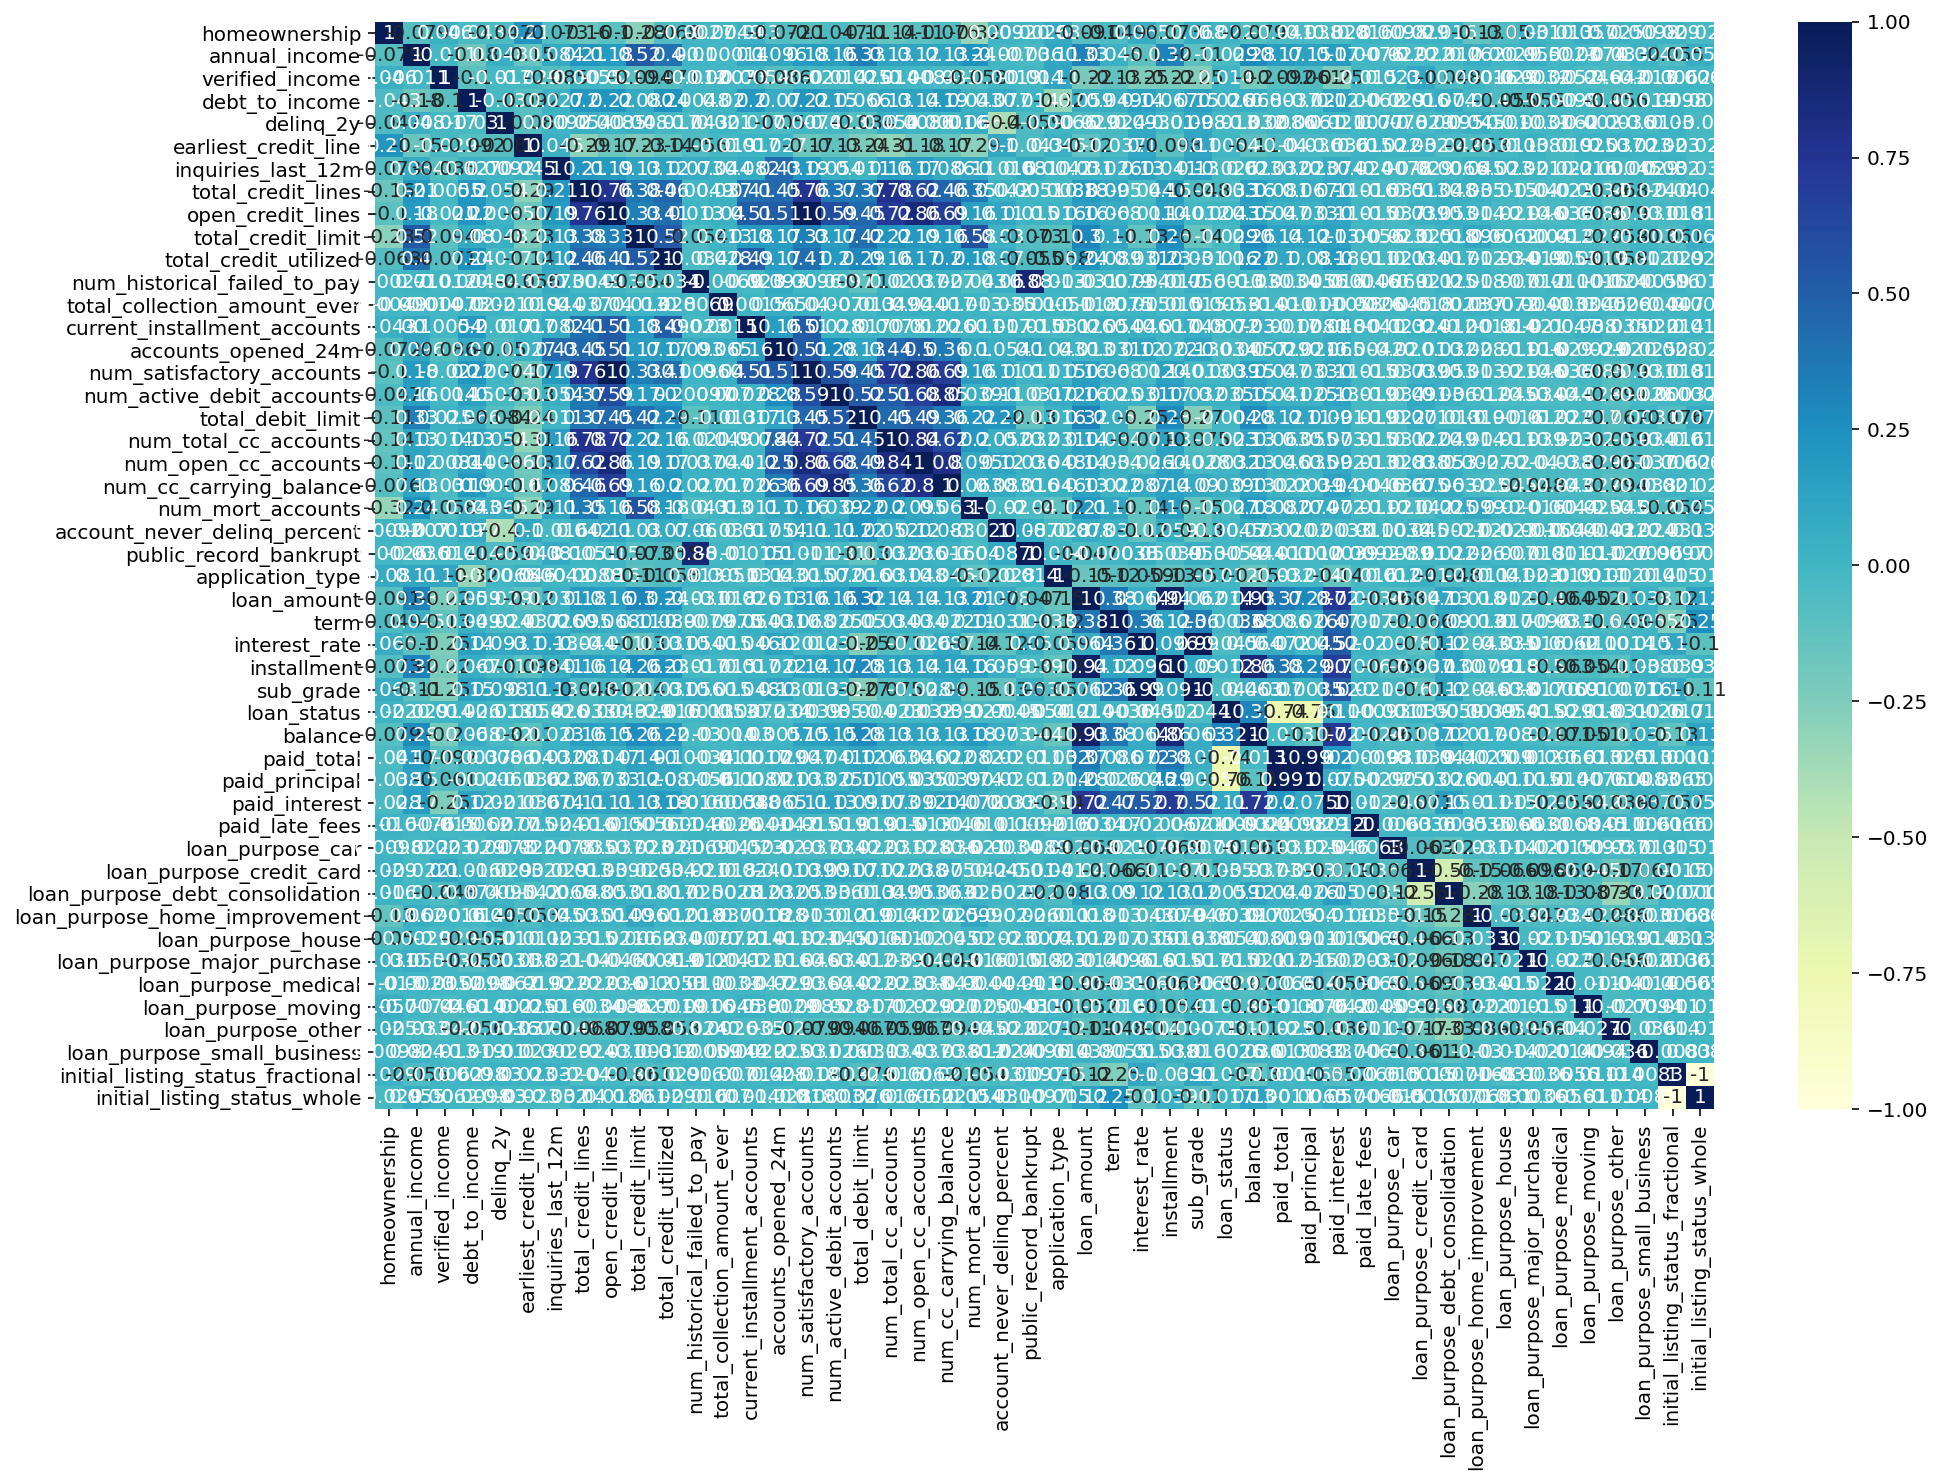

In [421]:
# Visualizing the data using heatmap
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df_cleaned.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [19]:
C['interest_rate']

homeownership                        0.065004
annual_income                       -0.104302
verified_income                     -0.247306
debt_to_income                       0.142798
delinq_2y                            0.092866
earliest_credit_line                 0.103934
inquiries_last_12m                   0.127561
total_credit_lines                  -0.044336
open_credit_lines                   -0.010868
total_credit_limit                  -0.131637
total_credit_utilized                0.030728
num_historical_failed_to_pay         0.053766
total_collection_amount_ever         0.014539
current_installment_accounts         0.046329
accounts_opened_24m                  0.121979
num_satisfactory_accounts           -0.011504
num_active_debit_accounts            0.031269
total_debit_limit                   -0.254728
num_total_cc_accounts               -0.070805
num_open_cc_accounts                -0.026397
num_cc_carrying_balance              0.086763
num_mort_accounts                 

As we can see from the graph and table above, the most relevant variable is sub_grade (0.993) and paid_interest(0.522)
We can plot them as scatter plots to see the data distribution!

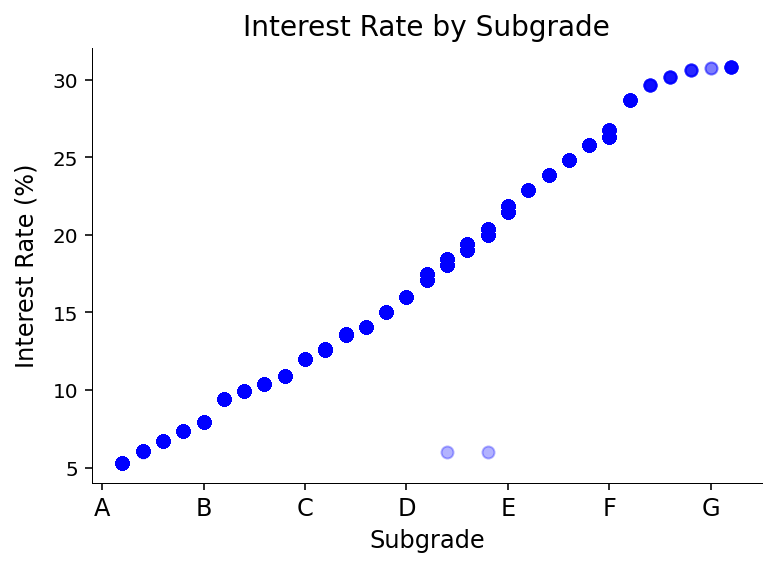

In [20]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_cleaned['sub_grade'], df_cleaned['interest_rate'], color='blue', alpha=0.3)

ax.set_xlabel('Subgrade', fontsize=12)
ax.set_ylabel('Interest Rate (%)', fontsize=12)
ax.set_title("Interest Rate by Subgrade", size=14)
# Set numerical y axis
ax.yaxis.set_label_coords(-0.08, 0.5)
# Set categorical ticks for x axis
ax.set_xticks(np.arange(7)*5)
ax.set_xticklabels(['A','B','C','D', 'E', 'F', 'G'], size=12)
#ax.tick_params(axis='x', length=0)    #Hide ticks in x axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

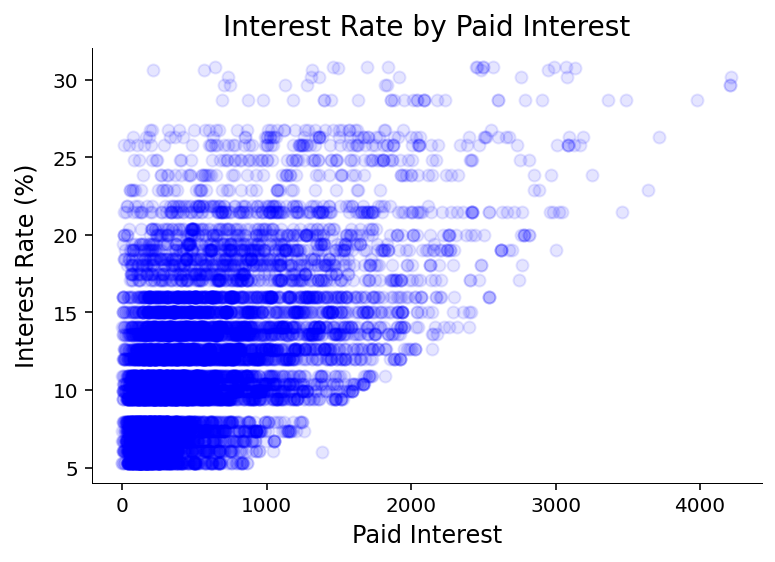

In [21]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_cleaned['paid_interest'], df_cleaned['interest_rate'], color='blue', alpha=0.1)

ax.set_xlabel('Paid Interest', fontsize=12)
ax.set_ylabel('Interest Rate (%)', fontsize=12)
ax.set_title("Interest Rate by Paid Interest", size=14)
# Set numerical y axis
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)


plt.show()

We can even plot them into 3D graph:

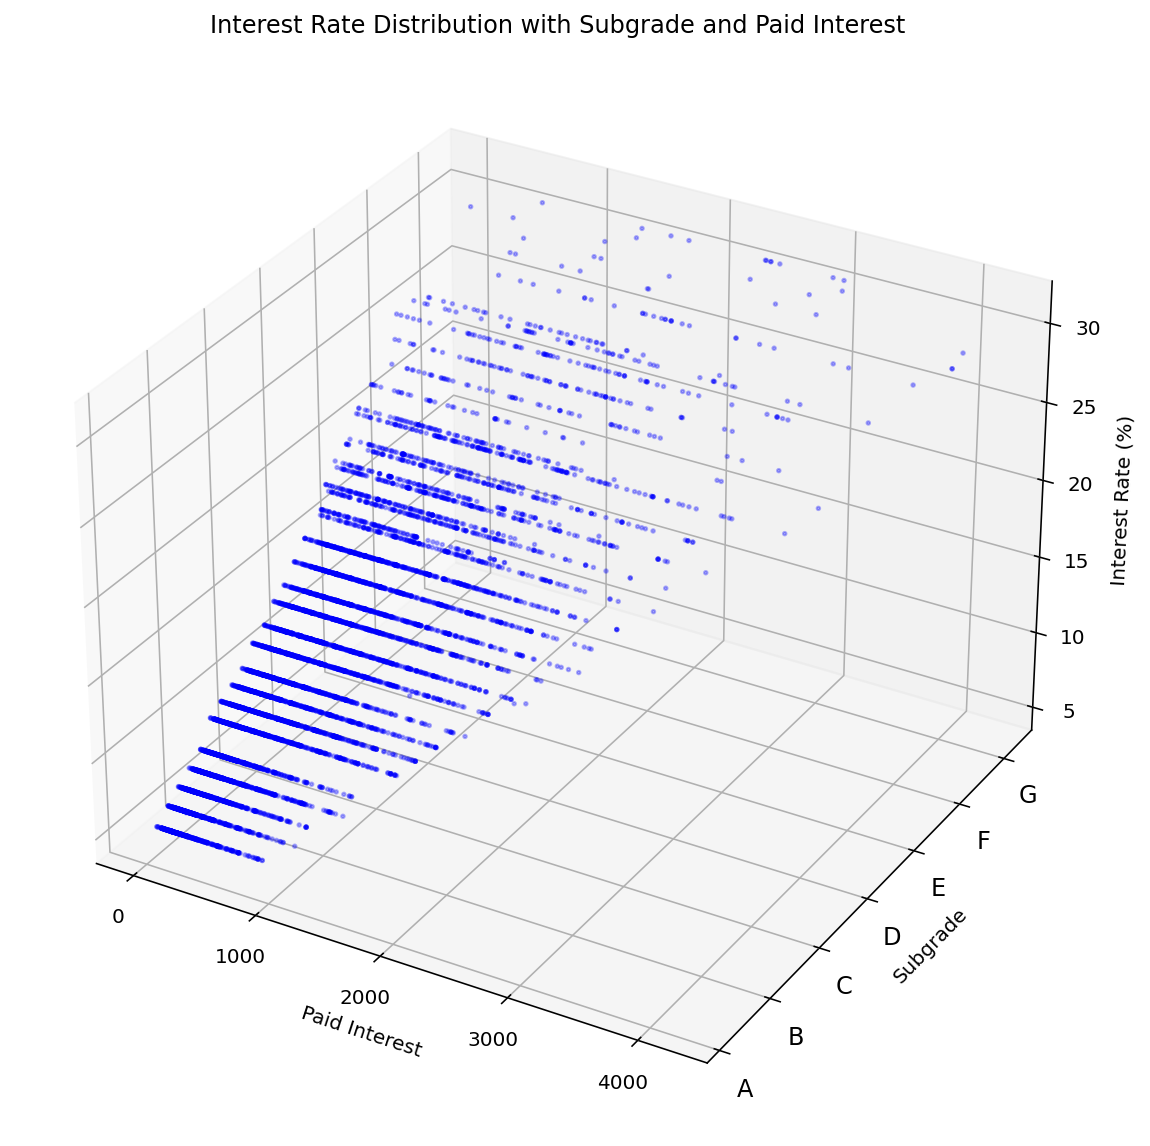

In [22]:

# Creating figure
fig = plt.figure(figsize = (30, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_cleaned['paid_interest'], df_cleaned['sub_grade'], df_cleaned['interest_rate'],
             color = 'blue', s=3,alpha=0.3)

# Set categorical ticks for y axis
ax.set_yticks(np.arange(7)*5)
ax.set_yticklabels(['A','B','C','D', 'E', 'F', 'G'], size=12)

ax.set_xlabel('Paid Interest')
ax.set_ylabel('Subgrade')
ax.set_zlabel('Interest Rate (%)')
plt.title("Interest Rate Distribution with Subgrade and Paid Interest")
 
# show plot
plt.show()

As we can see from the graphs above, subgrade has a strong linear correlation to interest rate; paid interest mainly determine the lower limit of the interest rate, but has no restraint to the upper limit.

### 2. Modeling Approach 1: Linear Regression Using `statsmodel`

#### 2.1 Perform Linear Regression

In [23]:
X = df_cleaned['sub_grade']
y = df_cleaned['interest_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [24]:
'''
By default, the statsmodel library fits a line that passes through the origin.
But if we observe the simple linear regression equation y = c + mX,
it has an intercept value as c.
So, to have an intercept, we need to add the add_constant attribute manually.
'''
X_train_sm = sm.add_constant(X_train)
# Fitting the resgression line using Ordinary Least Square method
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const        3.837193
sub_grade    0.845659
dtype: float64

In [25]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.809e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:11:15   Log-Likelihood:                -5802.8
No. Observations:                6678   AIC:                         1.161e+04
Df Residuals:                    6676   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8372      0.014    271.123      0.000       3.809       3.865
sub_grade      0.8457      0.001    693.494      0.000       0.843       0.848
==============================================================================
Omnibus:                     2067.897   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           286826.053
Skew:                          -0.331   Prob(JB):                         0.00
Kurtosis:                      35.100   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-success">
<h3> Discussions: </h3>

* The coefficient for `sub_grade` is 0.8457, and its corresponding p-value is very low (almost 0). That means the coefficient is statistically significant.
* R-squared value is 0.986, which means that 98.6% of the interest rate variance can be explained by the subgrade column using this line.
* Prob (F-statistic) has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let's go ahead and visualize how well the straight-line fits the scatter plot between `sub_grade` and `interest_rate` columns.
        
</div>

#### 2.2 Visualization of the Regression Line

From the parameters shown above, we have obtained the values of the intercept and the slope of the straight line. The equation of the line is

$interest$ $rate=3.8372+0.8457*subgrade $

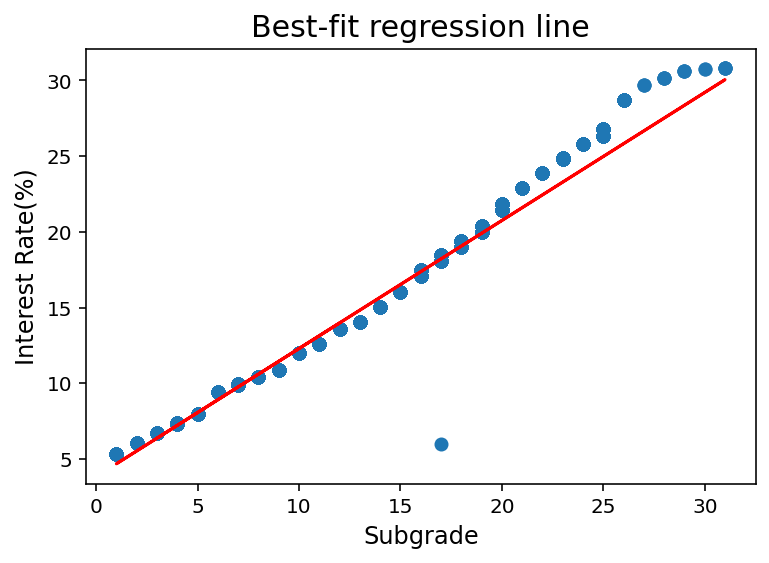

In [26]:
# Visualizing the regression line
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X_train, y_train)
ax.plot(X_train, 3.8372 + 0.8457*X_train, 'r')
ax.set_title('Best-fit regression line', fontsize = 15)
ax.set_xlabel('Subgrade', fontsize = 12)
ax.set_ylabel('Interest Rate(%)', fontsize = 12)
plt.show()

#### 2.3 Residual Analysis

One of the major assumptions of the linear regression model is the error terms are normally distributed.

$Error=y-\hat{y}$

where $y$ is the actual y value, and $\hat{y}$ is the predicted y value.

Now from the dataset, we have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [27]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

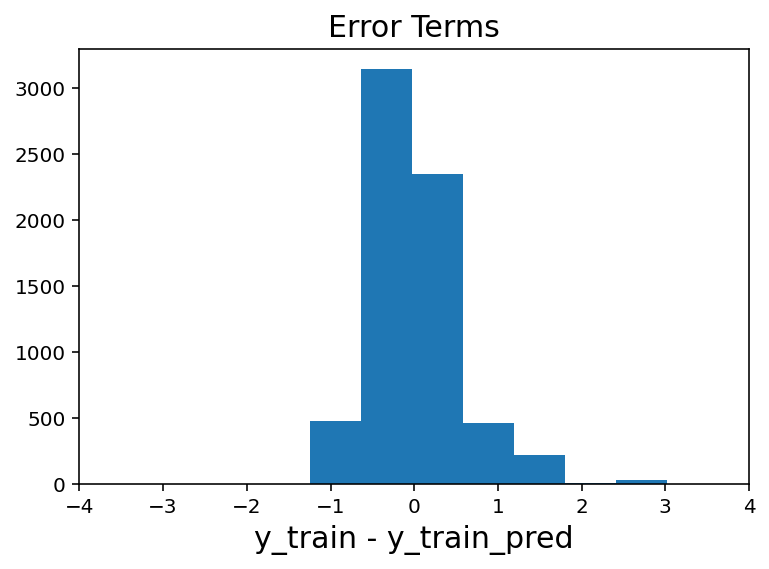

In [28]:
# Plotting the histogram using the residual values
fig, ax = plt.subplots(figsize=(6,4))
n, bins, patches = ax.hist(res, bins=25)
ax.set_title('Error Terms', fontsize = 15)
ax.set_xlabel('y_train - y_train_pred', fontsize = 15)
ax.set_xlim(-4, 4)
plt.show()

<div class="alert alert-block alert-success">

As we can see, the residuals are following the normal distribution graph with a mean 0.
        
</div>

Now, make sure that the residuals are not following any specific pattern.

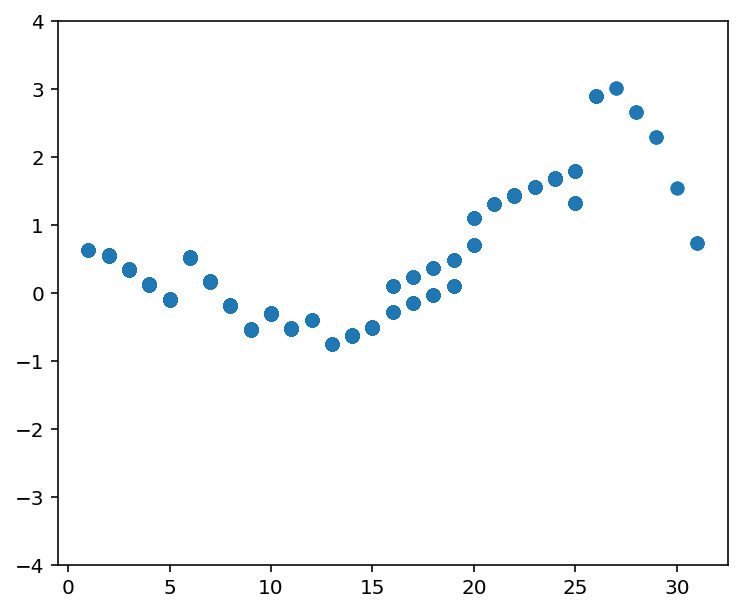

In [29]:
# Looking for any patterns in the residuals
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X_train, res)
ax.set_ylim(-4, 4)
plt.show()

<div class="alert alert-block alert-success">

Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.
        
</div>

#### 2.4. Predictions on the Test Data and Evaluations

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. Similar to the training dataset, we have to `add_constant` to the test data and predict the y values using the `predict` attribute present in the `statsmodel`.

In [30]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2044    13.985098
3989    13.985098
4833    15.676416
5141     9.756804
1861     5.528510
          ...    
8123    12.293781
1380     9.756804
9262     9.756804
6231    16.522075
1699    13.139439
Length: 2863, dtype: float64

Now, let’s calculate the `R2` value for the above-predicted y-values. We can do that by merely importing the `r2_score` library from `sklearn.metrics` package.

In [31]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9846913347652099

<div class="alert alert-block alert-success">

Since the R2 value on training data is 0.986, the R2 value on test data is within 5% of the R2 value on training data. In this case we can conclude that the model is pretty stable. This means, what the model has learned on the trainign set can generalize on the unseen test set.
</div>

Let's visualize the line on the test data.

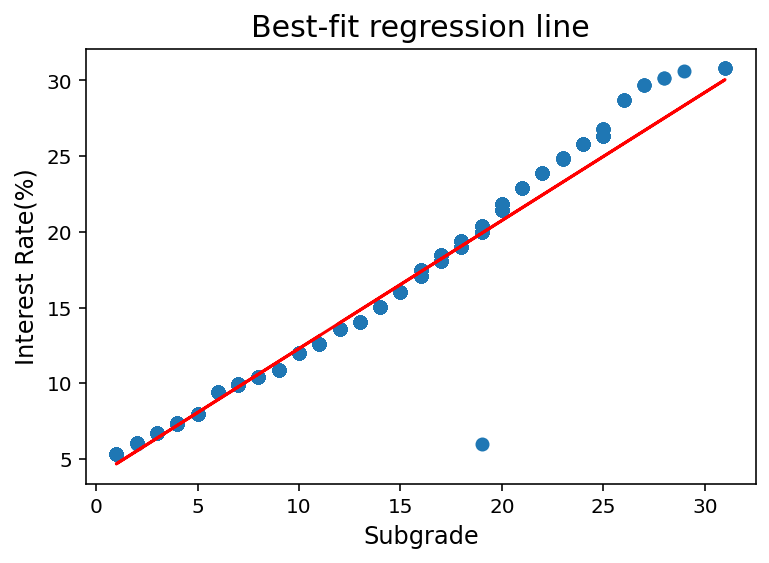

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X_test, y_test)
ax.plot(X_test, y_test_pred, 'r')
ax.set_title('Best-fit regression line', fontsize = 15)
ax.set_xlabel('Subgrade', fontsize = 12)
ax.set_ylabel('Interest Rate(%)', fontsize = 12)
plt.show()

### 3. Modeling Approach 2: Linear Regression Using `sklearn`

#### 3.1 Perform Linear Regression

In [33]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


For simple linear regression, we need to add a column to perform the regression fit properly.

In [34]:
# Shape of the train set without adding column
print("The shape of X_train before adding a column is ", X_train_lm.shape)

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print("The shape of X_train after adding a column is ", X_train_lm.shape)
print("The shape of X_test after adding a column is ", X_test_lm.shape)

The shape of X_train before adding a column is  (6678,)
The shape of X_train after adding a column is  (6678, 1)
The shape of X_test after adding a column is  (2863, 1)


Now we can conduct the linear regression using `sklearn.linear_model`

In [35]:
# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 3.8371927815254256
Slope : [0.84565879]


The straight-line equation we get for the above values is,

$interest$ $rate=3.8372+0.8467*subgrade$

If we observe, the equation we got here is the same as the one we got in the `statsmodel`.

#### 3.2 Predictions on the Test Data and Evaluations¶

In [36]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9863087206973497
0.9846913347652099


<div class="alert alert-block alert-success">

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.
</div>

### 4. Conclusions

<div class="alert alert-block alert-success">

* Data cleaning is performed to the original dataset. Unrelevant columns and outlier rows are removed.

* After calculating the correlation coefficients, it is found that `sub_grade` is able to dominate the target variable `interest_rate`.
    
* In this case, we can simply use numerized `sub_grade` value to build up linear regression model in `statsmodel` and `sklearn`. Both of the model predictions have shown good agreement with the actual values.
    
* Model evaluations are made to both modeling approaches and r2 score is used to prove the model has enough robustness and stability.
</div>



### 5. Reference

https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4